In [21]:
## Use DASH to build user GUI
# %pip install dash

from dash import Dash, html, dcc, callback, Output, Input, ctx
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from presets import setmedium

In [ ]:
press_data = pd.read_csv(r"C:\Users\geral\OneDrive\Documents\GitHub\TempCompliance4HIFU\src\sample_data.csv")  # sample_data == 121 x 501 double
mediumProp = setmedium.setMedium('Water',0)

# print(press_data)
# print(mediumProp)

<Figure size 640x480 with 0 Axes>

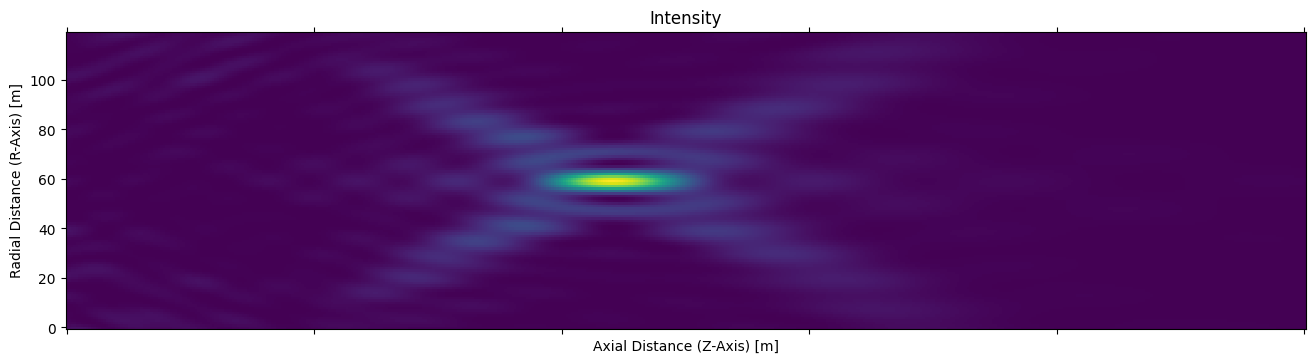

In [39]:
fig = plt.figure()
plt.matshow(press_data)
plt.gca().invert_yaxis()
plt.tick_params(labeltop=False)
plt.xlabel('Axial Distance (Z-Axis) [m]')
plt.ylabel('Radial Distance (R-Axis) [m]')
plt.title('Intensity')
plt.show(fig)

In [7]:
# help(html.Div)

In [25]:
app = Dash('tempCompliance4HIFU')
app.layout = [

    # Title
    html.H1(children = 'Temperature Compliance for HIFU Transducers', style = {'textAlign':'center'}), 
    html.H2(children = 'By Gerald Lee', style = {'textAlign':'center'}),


    # TOP Section - Button and Messages
    html.Div([
        html.Button('CALCULATE PRESSURE AND TEMPERATURE', id='button', n_clicks=0),
        html.Div(id='message_Display',style={'textAlign':'left'}),
    ],style={'width': '50%', 'float':'right', 'display': 'inline-block','padding': '10px 5px'}),
    
    
    # RIGHT Section - DISPLAYS
    html.Div([
        html.H2('Results', style ={'textAlign':'center'}), 
            dcc.Dropdown(['Pressure','Intensity','Temperature'],'Intensity',id='DROP_field2D'),
            dcc.Graph(id='GRAPH_field2D',hoverData={'points': [{'customdata': 'Pressure'}]}),
            dcc.Graph(id='GRAPH_time1D'),
    ], style={'width': '50%', 'float': 'right', 'display': 'inline-block'}),


    # SPACE
    html.Div([html.H3(' ',style ={'textAlign':'center'})],style={'width':'3%', 'float': 'right', 'display': 'inline-block'}),


    # MIDDLE Section - INPUTS
    html.Div([     
            
        # Trandsucer Section (Middle)
        html.H3('Transducer', style ={'textAlign':'center'}), 

        html.P('Frequency [MHz]', style ={'textAlign':'left'}),
        dcc.Input(id="Frequency", type='number', placeholder='Input Frequency'),

        html.P('F-Number', style ={'textAlign':'left'}),
        dcc.Input(id="FNum", type='number', placeholder='Input F Number'),

        html.P('Radius [mm]', style ={'textAlign':'left'}),
        dcc.Input(id="Radius", type='number', placeholder='Input Radius'),


        # Heating Section (Bottom)
        html.H3('Heating', style ={'textAlign':'center'}), 

        html.P('Time Heating [s]', style ={'textAlign':'left'}),
        dcc.Input(id="HeatTime", type='number', placeholder='Input Heat Time'),

        html.P('Time Cooling [s]', style ={'textAlign':'left'}),
        dcc.Input(id="CoolTime", type='number', placeholder='Input Cool Time'),

        html.P('Duty Cycle [Percentage]', style ={'textAlign':'left'}),
        dcc.Input(id="DutyCycle", type='number', placeholder='Input Duty Cycle'),

    ], style={'width': '15%', 'float': 'right', 'display': 'inline-block'}),


    # SPACE
    html.Div([html.H3(' ',style ={'textAlign':'center'})],style={'width':'3%', 'float': 'right', 'display': 'inline-block'}),


    # LEFT Section - Medium 
    html.Div([  
        html.H3('Medium', style ={'textAlign':'center'}), 

        html.P('Presets', style ={'textAlign':'left'}), 
        dcc.Dropdown(['Custom','Water','Glycerol','Egg White','Castor Oil'],'Water',id='DROP_medium'),
        
        html.P('Speed of Sound [m/s]', style ={'textAlign':'left'}), 
        dcc.Input(id="Speed", type='number', placeholder='Input Speed of Sound'),

        html.P('Density [kg/m^3]', style ={'textAlign':'left'}),
        dcc.Input(id="Density", type='number', placeholder='Input Density'),

        html.P('Absorption Coeffient [Np/(m*MHz^2)]', style ={'textAlign':'left'}),
        dcc.Input(id="AbsCoeff", type='number', placeholder='Input Absorption Coefficient'),
    
        html.P('Specific Heat Capacity [J/(kg*K)]', style ={'textAlign':'left'}),
        dcc.Input(id="SpecHeatCap", type='number', placeholder='Input Specific Heat Capacity'),
            
        html.P('Thermal Diffusivity [(m^2)/s]', style ={'textAlign':'left'}),
        dcc.Input(id="ThermDiff", type='number', placeholder='Input Thermal Diffusivity'),  
    ], style={'width': '15%', 'float': 'right', 'display': 'inline-block'}),

]

##### ##### Callbacks ##### ##### 


# Set Medium Properties Callback
@callback(
    Output('Speed','value'),
    Output('Density','value'),
    Output('AbsCoeff','value'),
    Output('SpecHeatCap','value'),
    Output('ThermDiff','value'),
    Input('DROP_medium','value'),
    Input('Speed','value'),
    Input('Density','value'),
    Input('AbsCoeff','value'),
    Input('SpecHeatCap','value'),
    Input('ThermDiff','value'),
)
def getMedium(dropdown, Speed, dens, abscoeff, heatcap, thermdiff):
    if Speed == None: Speed = 0
    if dens == None: dens = 0
    if abscoeff == None: abscoeff = 0
    if heatcap == None: heatcap = 0
    if thermdiff == None: thermdiff = 0
    userIn = dict(speed = Speed, density = dens, absCoeff = abscoeff, specHeatCap = heatcap, thermDiff = thermdiff)
    mediumProp = setmedium.setMedium(dropdown, userIn)
    return mediumProp['speed'], mediumProp['density'], mediumProp['absCoeff'], mediumProp['specHeatCap'], mediumProp['thermDiff']


# When Button is Pressed Callback
# @callback(
#     Output('message_Display', 'children'),
# )
def update_message():
    if 'button' == ctx.triggered_id:
        msg = 'Processing...'
    else:
        msg = ' '
    return html.Div(msg)









# Updating 2D Graph
@callback(
    Output('GRAPH_field2D','figure'),
    Input('DROP_field2D','value'),
)
def update_figure(dropdownSel):
    match dropdownSel:
        case 'Intensity':
            display_array = press_data^2
        case 'Pressure':
            display_array = press_data
        case 'Temperature':
            display_array = press_data/2

    # f = plt.figure()
    # nx = int(f.get_figwidth() * f.dpi)
    # ny = int(f.get_figheight() * f.dpi)
    # data = np.random.random((ny, nx))
    # f.figimage(data)
    # plt.show()

    fig = plt.figure()
    plt.matshow(display_array)
    plt.xlabel('Axial Distance (Z-Axis) [m]')
    plt.ylabel('Radial Distance (R-Axis) [m]')
    plt.title('Intensity')
    plt.show(fig)
    return fig





# Execute App
if __name__ == '__main__':
    app.run(debug=True)


---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
File c:\Users\geral\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\ops\array_ops.py:362, in na_logical_op(
    x=array([[212766.7069  , 149239.1421  ,  90588.813...8.272168,
          3001.824379,   2621.768882]]),
    y=True,
    op=<built-in function xor>
)
    353 try:
    354     # For exposition, write:
    355     #  yarr = isinstance(y, np.ndarray)
   (...)
    360     # Then Cases where this goes through without raising include:
    361     #  (xint or xbool) and (yint or bool)
--> 362     result = op(x, y)
        op = <built-in function xor>
        x = array([[212766.7069  , 149239.1421  ,  90588.81344 , ...,  37474.44695 ,
         36799.30937 ,  35266.36358 ],
       [238522.06    , 161261.4693  ,  90036.18317 , ...,  45922.59519 ,
         45733.36629 ,  44115.01903 ],
       [257796.1252  , 167261.9